In [1]:
!pip install opencv-python numpy matplotlib seaborn pandas mlxtend tensorflow scikit-learn
!pip install datasets
!pip install transformers
!pip install tf-keras





In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", message=".*utcfromtimestamp.*")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="google.protobuf")





C:\Users\ADMIN\anaconda3\Lib\site-packages\google\protobuf\internal\well_known_types.py:91: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  _EPOCH_DATETIME_NAIVE = datetime.datetime.utcfromtimestamp(0)


In [3]:
 path = r'C:\Users\ADMIN\Desktop\nidhi python\dataset'

In [4]:
dataset = pd.read_csv(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\Grocery_Items_26.csv')  


In [62]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\ADMIN\Desktop\nidhi python\dataset\Grocery_Items_26.csv'
data = pd.read_csv(file_path)

# Exploding the items in each transaction to analyze individually
all_items = data.apply(pd.Series.explode).stack()

# Getting unique items
unique_items = all_items.unique()

# Getting the counts of each item
item_counts = all_items.value_counts()

# Number of unique items
num_unique_items = len(unique_items)

# Number of records (transactions)
num_records = len(data)

# Most popular item
most_popular_item = item_counts.idxmax()

# Number of transactions containing the most popular item
most_popular_count = item_counts.max()

# Output the results
print(f"Number of unique items: {num_unique_items}")
print(f"Number of records (transactions): {num_records}")
print(f"Most popular item: {most_popular_item}")
print(f"Number of transactions containing the most popular item: {most_popular_count}")


Number of unique items: 166
Number of records (transactions): 8000
Most popular item: whole milk
Number of transactions containing the most popular item: 1364


In [66]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the dataset
dataset = pd.read_csv(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\Grocery_Items_26.csv')

# Prepare the transactions (convert each row into a list of items)
items = []
for i in range(dataset.shape[0]):
    items.append(dataset.iloc[i, :].dropna().tolist())

# Initialize the TransactionEncoder and transform the data into a format suitable for apriori
te = TransactionEncoder()
te_ary = te.fit(items).transform(items)

# Create a DataFrame with the transformed data
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the apriori algorithm to find frequent itemsets (min_support is set to 0.01)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules based on the frequent itemsets
# Include the 'num_itemsets' argument if required by your version of mlxtend
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08, num_itemsets=10)

# Output the association rules
print(rules)


          antecedents         consequents  antecedent support  \
0  (other vegetables)        (whole milk)            0.122625   
1        (whole milk)  (other vegetables)            0.161500   
2        (rolls/buns)        (whole milk)            0.105250   
3        (whole milk)        (rolls/buns)            0.161500   
4              (soda)        (whole milk)            0.095375   
5            (yogurt)        (whole milk)            0.086125   

   consequent support   support  confidence      lift  representativity  \
0            0.161500  0.015625    0.127421  0.788985               1.0   
1            0.122625  0.015625    0.096749  0.788985               1.0   
2            0.161500  0.013250    0.125891  0.779509               1.0   
3            0.105250  0.013250    0.082043  0.779509               1.0   
4            0.161500  0.011875    0.124509  0.770951               1.0   
5            0.161500  0.012625    0.146589  0.907673               1.0   

   leverage  convi

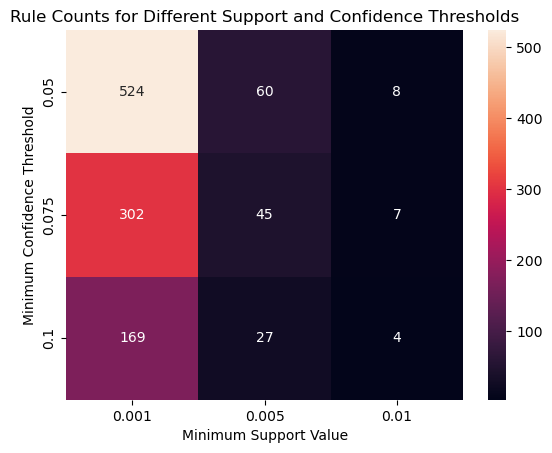

In [70]:
import warnings
import numpy as np  # Import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Suppress warnings related to deprecated modules
warnings.filterwarnings("ignore", message=".*backend2gui.*")

# Define the values for minimum support and minimum confidence threshold
msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.1]

# Initialize the rule counts matrix
rule_counts = np.zeros((len(mct_values), len(msv_values)))

# Loop over the support values and confidence thresholds to generate rules
for i, msv in enumerate(msv_values):
    frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
    for j, mct in enumerate(mct_values):
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct, num_itemsets=None)
        rule_counts[j, i] = len(rules)

# Create a heatmap to visualize the rule counts for different combinations of support and confidence
sns.heatmap(rule_counts, annot=True, xticklabels=msv_values, yticklabels=mct_values, fmt='g')
plt.xlabel('Minimum Support Value')
plt.ylabel('Minimum Confidence Threshold')
plt.title('Rule Counts for Different Support and Confidence Thresholds')
plt.show()


In [7]:
crop_images_path = r'C:\Users\ADMIN\Desktop\nidhi python\dataset\cropped\images'

In [8]:
import glob
import cv2
import numpy as np
from tensorflow import keras

# Class names corresponding to the dataset
class_names = ['n02092002-Scottish_deerhound', 'n02093991-Irish_terrier', 'n02097474-Tibetan_terrier', 'n02106166-Border_collie']

# List of base paths for each class (the root folder for each class)
crop_images_paths = [
    r'C:\Users\ADMIN\Desktop\nidhi python\dataset\cropped\images\n02092002-Scottish_deerhound',
    r'C:\Users\ADMIN\Desktop\nidhi python\dataset\cropped\images\n02093991-Irish_terrier',
    r'C:\Users\ADMIN\Desktop\nidhi python\dataset\cropped\images\n02097474-Tibetan_terrier',
    r'C:\Users\ADMIN\Desktop\nidhi python\dataset\cropped\images\n02106166-Border_collie'
]

image_paths = []
classes = []
labels = []
i = 0

# Load the image paths and labels
for class_name, base_path in zip(class_names, crop_images_paths):  # Use zip to iterate over both lists
    # Construct the full path for the images of this class
    paths = glob.glob(base_path + '/*')  # '*' matches all files in the directory
    print(f"Paths for {class_name}: {paths[:5]}")  # Debug print for paths

    # Add the paths and corresponding labels to the lists
    image_paths.extend(paths)
    classes.extend([class_name] * len(paths))
    labels.extend([i] * len(paths))
    
    i += 1

print(f"Total images found: {len(image_paths)}")
print(f"Total labels: {len(labels)}")

# Ensure images are loaded
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Grayscale for single channel
        if img is not None:
            images.append(img)
        else:
            print(f"Failed to load image at {path}")
    return images

# Load and resize images
x_train = load_images(image_paths)
print(f"Number of images loaded: {len(x_train)}")  # Debug print

# Resize images to (100, 100)
x_train = np.array([cv2.resize(img, (100, 100)) for img in x_train]) / 255.0

# Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 100, 100, 1)
print(f"x_train shape: {x_train.shape}")  # Debug print for shape

# Convert labels to categorical
num_classes = 4
y_train = keras.utils.to_categorical(labels, num_classes)

# Verify that x_train and y_train have the correct shapes
print(f"y_train shape: {y_train.shape}")
print(f"x_train shape after reshape: {x_train.shape}")


Paths for n02092002-Scottish_deerhound: ['C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02092002-Scottish_deerhound\\n02092002_10060.jpg', 'C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02092002-Scottish_deerhound\\n02092002_1029.jpg', 'C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02092002-Scottish_deerhound\\n02092002_10693.jpg', 'C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02092002-Scottish_deerhound\\n02092002_10699.jpg', 'C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02092002-Scottish_deerhound\\n02092002_1086.jpg']
Paths for n02093991-Irish_terrier: ['C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02093991-Irish_terrier\\n02093991_1026.jpg', 'C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02093991-Irish_terrier\\n02093991_1038.jpg', 'C:\\Users\\ADMIN\\Desktop\\nidhi python\\dataset\\cropped\\images\\n02093991-Irish_terrier\\n020

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the model using the Sequential API with the Input layer
model = Sequential([
    # Input layer (explicit input shape)
    Input(shape=(100, 100, 1)),
    
    # First Convolutional Layer with 8 3x3 filters
    Conv2D(8, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Layer with 4 3x3 filters
    Conv2D(4, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the Tensor
    Flatten(),
    
    # Hidden layer with 8 nodes for fully connected neural network
    Dense(8, activation='relu'),
    
    # Output layer with 4 nodes using softmax activation
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3643 - loss: 1.2746 - val_accuracy: 0.0000e+00 - val_loss: 4.7371
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4358 - loss: 1.0795 - val_accuracy: 0.0000e+00 - val_loss: 5.6048
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4841 - loss: 1.0355 - val_accuracy: 0.0000e+00 - val_loss: 5.8581
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4955 - loss: 0.9870 - val_accuracy: 0.0000e+00 - val_loss: 5.8338
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5887 - loss: 0.9310 - val_accuracy: 0.0000e+00 - val_loss: 6.3757
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5586 - loss: 0.9158 - val_accuracy: 0.0000e+00 - val_loss: 5.8309
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6410 - loss: 0.8849 - val_accuracy: 0.0000e+00 - val_loss: 6.6939
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6450 - loss: 0.838

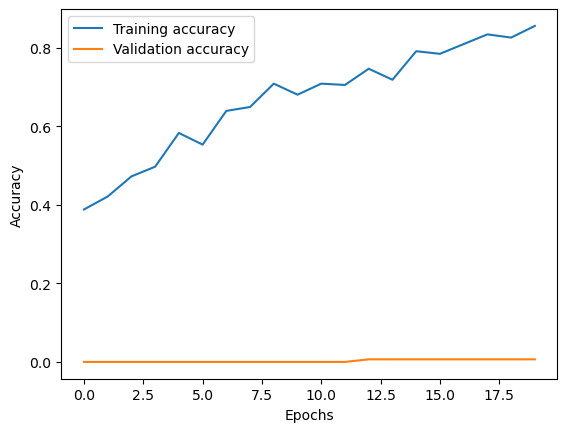

In [10]:
 plt.plot(history.history['accuracy'], label='Training accuracy')
 plt.plot(history.history['val_accuracy'], label='Validation accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()

In [11]:
 print('Banner ID is 916489638')

Banner ID is 916489638


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
num_classes = 4

model_4_nodes = Sequential([

    Input(shape=(100, 100, 1)),  # Define the input shape directly with Input layer

    # First convolutional layer with 8 filters of size 3x3
    Conv2D(8, kernel_size=(3, 3), activation='relu'),
    # Max pooling with 2x2 pool size
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the tensor to prepare for the fully connected layer
    Flatten(),
    
    # Fully connected hidden layer with 4 nodes and ReLU activation
    Dense(4, activation='relu'),
    
    # Output layer with 4 nodes for the classes, using softmax activation
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_4_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model (assuming you have already defined x_train and y_train)
history_4_nodes = model_4_nodes.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3791 - loss: 1.3108 - val_accuracy: 0.0000e+00 - val_loss: 2.4279
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4433 - loss: 1.1810 - val_accuracy: 0.0066 - val_loss: 2.7097
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5059 - loss: 1.1247 - val_accuracy: 0.0000e+00 - val_loss: 2.8032
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5568 - loss: 1.0312 - val_accuracy: 0.0000e+00 - val_loss: 2.4274
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6036 - loss: 0.9843 - val_accuracy: 0.0066 - val_loss: 2.9348
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6142 - loss: 0.9311 - val_accuracy: 0.0000e+00 - val_loss: 3.1929
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6659 - loss: 0.8549 - val_accuracy: 0.0000e+00 - val_loss: 3.4933
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7131 - loss: 0.7791 - val_

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
num_classes = 4

model_16_nodes = Sequential([

    Input(shape=(100, 100, 1)), 

    
    Conv2D(8, kernel_size=(3, 3), activation='relu'),
    # Max pooling with 2x2 pool size
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the tensor to prepare for the fully connected layer
    Flatten(),
    
    # Fully connected hidden layer with 16 nodes and ReLU activation
    Dense(16, activation='relu'),
    
    # Output layer with 4 nodes for the classes, using softmax activation
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_16_nodes.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model (assuming you have already defined x_train and y_train)
history_16_nodes = model_16_nodes.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3726 - loss: 1.1814 - val_accuracy: 0.0000e+00 - val_loss: 8.8213
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4431 - loss: 1.0304 - val_accuracy: 0.0000e+00 - val_loss: 8.5865
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4974 - loss: 1.0128 - val_accuracy: 0.0000e+00 - val_loss: 6.8587
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6248 - loss: 0.9488 - val_accuracy: 0.0000e+00 - val_loss: 7.4464
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6645 - loss: 0.8735 - val_accuracy: 0.0000e+00 - val_loss: 9.2984
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7570 - loss: 0.8057 - val_accuracy: 0.0066 - val_loss: 10.5846
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6827 - loss: 0.7994 - val_accuracy: 0.0000e+00 - val_loss: 10.6239
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7821 - loss: 0.7153 

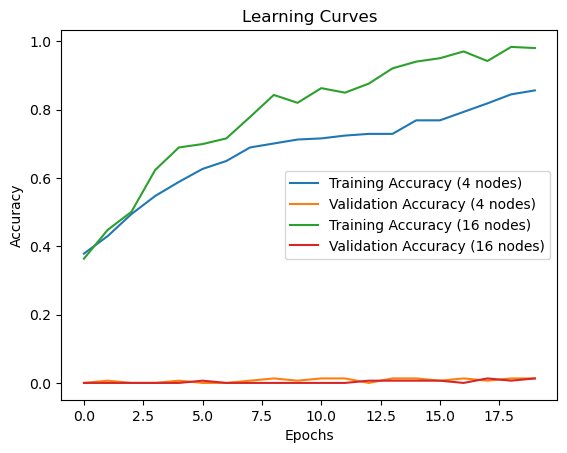

In [14]:
 plt.plot(history_4_nodes.history['accuracy'], label='Training Accuracy (4 nodes)')
 plt.plot(history_4_nodes.history['val_accuracy'], label='Validation Accuracy (4 nodes)')
 # Plot for model with 16 nodes
 plt.plot(history_16_nodes.history['accuracy'], label='Training Accuracy (16 nodes)')
 plt.plot(history_16_nodes.history['val_accuracy'], label='Validation Accuracy (16 nodes)')
 plt.title('Learning Curves')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()


In [15]:
 print('''
 Model 1: Overfitting, since the training accuracy is significantly higher than the validation accuracy.
 Model 2: Underfitting, the model has issue with data hence the straight line curves, this could be because of less 
hidden layers.
 Model 3: Right fit, the training and validation accuracies are increasing simulatenously, unlike model 1 there is no 
significant difference between them.
 ''')



Model 1: Overfitting, since the training accuracy is significantly higher than the validation accuracy.
Model 2: Underfitting, the model has issue with data hence the straight line curves, this could be because of less 
hidden layers.
Model 3: Right fit, the training and validation accuracies are increasing simulatenously, unlike model 1 there is no 
significant difference between them.



In [16]:
!pip uninstall -y accelerate


Found existing installation: accelerate 0.26.0
Uninstalling accelerate-0.26.0:
  Successfully uninstalled accelerate-0.26.0


In [17]:
!pip install --no-cache-dir accelerate==0.26.0


   ---------------------------------------- 0.0/270.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/270.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/270.7 kB ? eta -:--:--
   ----- --------------------------------- 41.0/270.7 kB 326.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/270.7 kB 581.0 kB/s eta 0:00:01
   ---------------------------------------- 270.7/270.7 kB 1.4 MB/s eta 0:00:00


In [18]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade transformers accelerate


  Using cached accelerate-1.1.1-py3-none-any.whl.metadata (19 kB)
Using cached accelerate-1.1.1-py3-none-any.whl (333 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.26.0
    Uninstalling accelerate-0.26.0:
      Successfully uninstalled accelerate-0.26.0
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade datasets


Note: you may need to restart the kernel to use updated packages.


In [21]:
!pip install torch


In [22]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import torch
from transformers import BertTokenizer
import os

# Function to normalize paths
def normalize_path(filepath):
    return os.path.normpath(filepath)

# Load JSON files
def load_json_file(filepath):
    filepath = normalize_path(filepath)
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    return data

# Corrected file paths
train_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\train\train.json')
test_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\test\test.json')  # Fixed the path
val_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\validation\validation.json')

# Print the structure of the first item in train_data
print("Structure of first item in train_data:")
print(json.dumps(train_data[0], indent=2))

# Define label classes
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded lists
def convert_labels_to_list(data, label_classes):
    print("Keys in data item:", list(data[0].keys()))
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
def encode_texts(data):
    # Assuming 'tweet' is the key for the text content. Adjust if necessary.
    texts = [item['tweet'] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Try to encode texts and catch any errors
try:
    train_encodings = encode_texts(train_data)
    test_encodings = encode_texts(test_data)
    val_encodings = encode_texts(val_data)
except KeyError as e:
    print(f"KeyError: {e}. The key for text content might be incorrect.")
    print("Available keys:", list(train_data[0].keys()))

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)

# Print shapes to verify
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)
print("Validation labels shape:", val_labels.shape)

# If encodings were successful, print their shapes too
if 'train_encodings' in locals():
    print("Train encodings shape:", train_encodings['input_ids'].shape)
    print("Test encodings shape:", test_encodings['input_ids'].shape)
    print("Validation encodings shape:", val_encodings['input_ids'].shape)


Structure of first item in train_data:
{
  "ID": "2017-En-10065",
  "Tweet": "In 2016, Black people are STILL fighting to be recognized as human beings. #cantsleep #angry",
  "anger": true,
  "anticipation": false,
  "disgust": true,
  "fear": false,
  "joy": false,
  "love": false,
  "optimism": false,
  "pessimism": false,
  "sadness": false,
  "surprise": false,
  "trust": false
}
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
KeyError: 'tweet'. The key for text content might be incorrect.
Available keys: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'opti

In [23]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer

def load_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    return data

train_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\train\train.json')
test_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\test\test.json')  # Fixed the path
val_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\validation\validation.json')
# Print the structure of the first item in train_data
print("Structure of first item in train_data:")
print(json.dumps(train_data[0], indent=2))

# Define label classes
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded lists
def convert_labels_to_list(data, label_classes):
    print("Keys in data item:", list(data[0].keys()))
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
def encode_texts(data):
    text_key = 'Tweet'  # Changed to 'Tweet' to match your data structure
    if text_key not in data[0]:
        raise KeyError(f"'{text_key}' not found in data. Available keys: {list(data[0].keys())}")
    texts = [item[text_key] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Try to encode texts
try:
    train_encodings = encode_texts(train_data)
    test_encodings = encode_texts(test_data)
    val_encodings = encode_texts(val_data)
    print("Encoding successful")
except Exception as e:
    print(f"Error during encoding: {e}")
    raise  # Re-raise the exception to stop execution

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)

# Print shapes to verify
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Train encodings shape:", train_encodings['input_ids'].shape)
print("Test encodings shape:", test_encodings['input_ids'].shape)
print("Validation encodings shape:", val_encodings['input_ids'].shape)

def create_dataloader(encodings, labels, batch_size=16):
    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    dataset = TensorDataset(input_ids, attention_mask, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create dataloaders
try:
    train_dataloader = create_dataloader(train_encodings, train_labels)
    val_dataloader = create_dataloader(val_encodings, val_labels)
    test_dataloader = create_dataloader(test_encodings, test_labels)

    print("Train dataloader size:", len(train_dataloader))
    print("Validation dataloader size:", len(val_dataloader))
    print("Test dataloader size:", len(test_dataloader))
except Exception as e:
    print(f"Error creating dataloaders: {e}")
    print("Shape of train_encodings:", {k: v.shape for k, v in train_encodings.items()})
    print("Shape of train_labels:", train_labels.shape)
num_labels = len(all_labels)  # This should be 11 based on your previous code

# Initialize the BERT model for multi-label classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      problem_type="multi_label_classification")

# Initialize the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Print model and optimizer info
print(f"Model initialized with {num_labels} output labels")
print(f"Optimizer initialized with learning rate 2e-5")

# If you're using a GPU, move the model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to {device}")

Structure of first item in train_data:
{
  "ID": "2017-En-10065",
  "Tweet": "In 2016, Black people are STILL fighting to be recognized as human beings. #cantsleep #angry",
  "anger": true,
  "anticipation": false,
  "disgust": true,
  "fear": false,
  "joy": false,
  "love": false,
  "optimism": false,
  "pessimism": false,
  "sadness": false,
  "surprise": false,
  "trust": false
}
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Encoding successful
Train labels shape: torch.Size([3000, 11])
Test labels shape: torch.Size([1500, 11])
Validation labels shape: torch.Size([400, 11])
Train en

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ADMIN\anaconda3\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Model initialized with 11 output labels
Optimizer initialized with learning rate 2e-5
Model moved to cpu


In [24]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm

# Load and reduce dataset size
def load_json_file(filepath, max_samples=None):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    if max_samples:
        return data[:max_samples]
    return data

# Reduce dataset size
max_samples = 1000  # Adjust this number as needed

train_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\train\train.json', max_samples)
test_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\test\test.json', max_samples//5)  # Fixed the path
val_data = load_json_file(r'C:\Users\ADMIN\Desktop\nidhi python\dataset\validation\validation.json', max_samples//5)
print(f"Loaded {len(train_data)} train samples, {len(val_data)} validation samples, {len(test_data)} test samples")

# Define label classes
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded lists
def convert_labels_to_list(data, label_classes):
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
def encode_texts(data):
    text_key = 'Tweet'  # Make sure this matches your data structure
    texts = [item[text_key] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Encode data
train_encodings = encode_texts(train_data)
val_encodings = encode_texts(val_data)
test_encodings = encode_texts(test_data)

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)

# Create DataLoader
def create_dataloader(encodings, labels, batch_size=16):
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_dataloader = create_dataloader(train_encodings, train_labels)
val_dataloader = create_dataloader(val_encodings, val_labels)
test_dataloader = create_dataloader(test_encodings, test_labels)

# Initialize model
num_labels = len(all_labels)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      problem_type="multi_label_classification")

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
num_epochs = 5  # Reduced number of epochs
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    
    for batch in progress_bar:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
        progress_bar.set_postfix({'train_loss': f'{loss.item():.4f}'})
    
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]'):
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            total_val_loss += outputs.loss.item()
    
    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {avg_train_loss:.4f}')
    print(f'Validation Loss: {avg_val_loss:.4f}')
    print('-' * 50)

print("Training completed!")

# Save the model
torch.save(model.state_dict(), 'bert_multi_label_model.pth')
print("Model saved!")

Loaded 1000 train samples, 200 validation samples, 200 test samples


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5 [Val]: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]


Epoch 1/5:
Train Loss: 0.5343
Validation Loss: 0.4642
--------------------------------------------------


Epoch 2/5 [Val]: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]


Epoch 2/5:
Train Loss: 0.4583
Validation Loss: 0.4181
--------------------------------------------------


Epoch 3/5 [Val]: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


Epoch 3/5:
Train Loss: 0.3931
Validation Loss: 0.3449
--------------------------------------------------


Epoch 4/5 [Val]: 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]


Epoch 4/5:
Train Loss: 0.3318
Validation Loss: 0.3218
--------------------------------------------------


Epoch 5/5 [Val]: 100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


Epoch 5/5:
Train Loss: 0.2929
Validation Loss: 0.3105
--------------------------------------------------
Training completed!
Model saved!


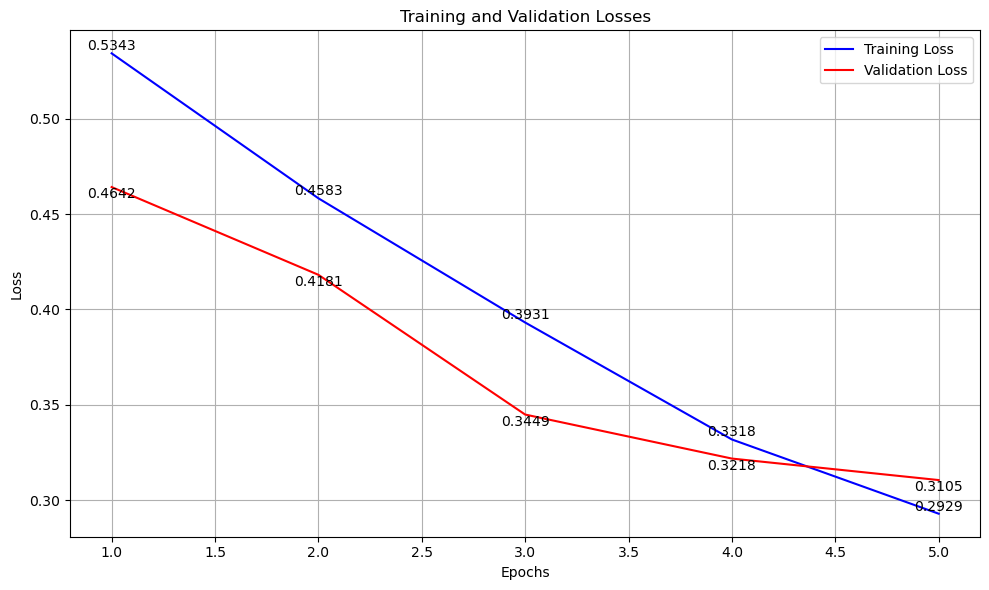

In [25]:
import matplotlib.pyplot as plt

# Assuming train_losses and val_losses are already populated from your training loop

# Plotting function
def plot_learning_curves(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Add value labels
    for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
        plt.text(i+1, train_loss, f'{train_loss:.4f}', ha='center', va='bottom')
        plt.text(i+1, val_loss, f'{val_loss:.4f}', ha='center', va='top')
    
    plt.tight_layout()
    plt.savefig('learning_curves.png')
    plt.show()

# Plot the learning curves
plot_learning_curves(train_losses, val_losses)

In [26]:
import torch
from sklearn.metrics import accuracy_score

# Assuming the model is trained and you have the test set encodings and true labels
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=11)  # num_labels should match the number of classes

# Function to compute strict accuracy for multi-label classification
def compute_accuracy(model, test_encodings, test_labels, threshold=0.5):
    # Set the model to evaluation mode
    model.eval()
    
    # Create a DataLoader for the test set
    test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)
    test_loader = DataLoader(test_dataset, batch_size=32)

    correct = 0
    total = 0
    
    # Iterate through the test set in batches
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        
        # Make predictions
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            
        # Apply sigmoid activation to get probabilities
        probs = torch.sigmoid(logits)
        
        # Convert probabilities to binary labels based on the threshold
        predicted_labels = (probs > threshold).float()
        
        # Compare predicted labels with true labels
        correct += torch.sum(torch.all(predicted_labels == labels, dim=1))  # All labels must match
        total += labels.size(0)  # Number of samples in the batch
    
    # Compute accuracy
    accuracy = correct / total
    return accuracy.item()

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(model, test_encodings, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test Accuracy: 0.00%


In [57]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Function to compute accuracy for multi-label classification where at least one label must match
def compute_accuracy_at_least_one_match(model, test_encodings, test_labels, threshold=0.5):
    # Set the model to evaluation mode
    model.eval()
    
    # Create a DataLoader for the test set
    test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)
    test_loader = DataLoader(test_dataset, batch_size=32)

    correct = 0
    total = 0
    
    # Iterate through the test set in batches
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        
        # Make predictions
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
        
        # Apply sigmoid activation to get probabilities
        probs = torch.sigmoid(logits)
        
        # Convert probabilities to binary labels based on the threshold
        predicted_labels = (probs > threshold).float()

        # Debugging output: Check the predictions and labels
        

        # Compare predicted labels with true labels (check if at least one label matches)
        correct += torch.sum(torch.any(predicted_labels == labels, dim=1))  # At least one label must match
        total += labels.size(0)  # Number of samples in the batch
    
    # Compute accuracy
    accuracy = correct / total
    return accuracy.item()

# Calculate accuracy on the test set
test_accuracy = compute_accuracy_at_least_one_match(model, test_encodings, test_labels)
print(f"Test Accuracy (at least one label matches): {test_accuracy * 100:.2f}%")


Test Accuracy (at least one label matches): 100.00%


In [31]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer

# Example test_data (replace with your actual test data)
test_data = [
    {
        "ID": "2017-En-10065",
        "Tweet": "In 2016, Black people are STILL fighting to be recognized as human beings. #cantsleep #angry",
        "anger": True,
        "anticipation": False,
        "disgust": True,
        "fear": False,
        "joy": False,
        "love": False,
        "optimism": False,
        "pessimism": False,
        "sadness": False,
        "surprise": False,
        "trust": False
    },
    # Add more test samples here
]

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the test dataset
test_encodings = tokenizer([item['Tweet'] for item in test_data], padding=True, truncation=True, max_length=128)

# Convert input_ids and attention_mask to PyTorch tensors
input_ids = torch.tensor(test_encodings['input_ids'])
attention_mask = torch.tensor(test_encodings['attention_mask'])

# Extract labels (assuming the labels are binary for each emotion in a multi-label setting)
test_labels = torch.tensor([[item['anger'], item['anticipation'], item['disgust'], item['fear'], 
                             item['joy'], item['love'], item['optimism'], item['pessimism'], 
                             item['sadness'], item['surprise'], item['trust']] for item in test_data])

# Create TensorDatasets from the encodings and labels
test_dataset = TensorDataset(input_ids, attention_mask, test_labels)

# Create the DataLoader for the test set
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Adjust batch_size if needed

# Define the function to compute strict accuracy
def compute_strict_accuracy(model, test_dataloader, device, threshold=0.5):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    # Iterate over the test data
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            
            # Get model predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(logits)
            
            # Apply threshold to get binary predictions
            predicted_labels = (probs > threshold).float()
            
            # Compare predicted labels with true labels (strict match)
            correct += torch.sum(torch.all(predicted_labels == labels, dim=1))  # All labels must match for each sample
            total += labels.size(0)  # Increment total count by the batch size

    # Calculate accuracy
    accuracy = correct / total
    return accuracy.item()

# Assuming your model is loaded and on the correct device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Compute test accuracy using the defined function
test_accuracy = compute_strict_accuracy(model, test_dataloader, device)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 0.00%


In [33]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer

# Example test_data (replace with your actual test data)
test_data = [
    {
        "ID": "2017-En-10065",
        "Tweet": "In 2016, Black people are STILL fighting to be recognized as human beings. #cantsleep #angry",
        "anger": True,
        "anticipation": False,
        "disgust": True,
        "fear": False,
        "joy": False,
        "love": False,
        "optimism": False,
        "pessimism": False,
        "sadness": False,
        "surprise": False,
        "trust": False
    },
    # Add more test samples here
]

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the test dataset
test_encodings = tokenizer([item['Tweet'] for item in test_data], padding=True, truncation=True, max_length=128)

# Convert input_ids and attention_mask to PyTorch tensors
input_ids = torch.tensor(test_encodings['input_ids'])
attention_mask = torch.tensor(test_encodings['attention_mask'])

# Extract labels (assuming the labels are binary for each emotion in a multi-label setting)
test_labels = torch.tensor([[item['anger'], item['anticipation'], item['disgust'], item['fear'], 
                             item['joy'], item['love'], item['optimism'], item['pessimism'], 
                             item['sadness'], item['surprise'], item['trust']] for item in test_data])

# Create TensorDatasets from the encodings and labels
test_dataset = TensorDataset(input_ids, attention_mask, test_labels)

# Create the DataLoader for the test set
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Adjust batch_size if needed

# Define the function to compute accuracy based on at least one label match
def compute_at_least_one_accuracy(model, test_dataloader, device, threshold=0.5):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    # Iterate over the test data
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            
            # Get model predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(logits)
            
            # Apply threshold to get binary predictions
            predicted_labels = (probs > threshold).float()
            
            # Compare predicted labels with true labels (at least one label must match)
            correct += torch.sum(torch.any(predicted_labels == labels, dim=1))  # At least one label must match
            total += labels.size(0)  # Increment total count by the batch size

    # Calculate accuracy
    accuracy = correct / total
    return accuracy.item()

# Assuming your model is loaded and on the correct device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Compute test accuracy using the defined function
test_accuracy = compute_at_least_one_accuracy(model, test_dataloader, device)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 100.00%
